In [1]:
import matplotlib
%matplotlib inline

import numpy as np, matplotlib as mpl
import PreFRBLE
from PreFRBLE.convenience import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *


In [2]:
redshift_estimates = GetEstimatedRedshifts()

In [3]:
#redshift_estimates.dtype.names
#(b"%s" % 'CHIME') in 
#redshift_estimates['telescope'] 


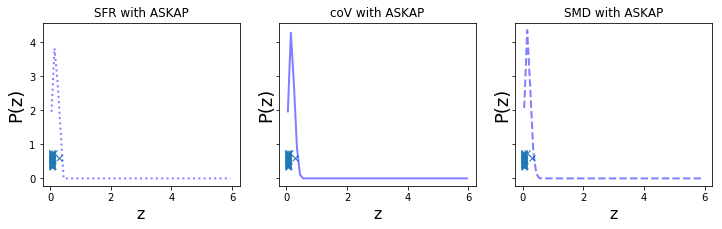

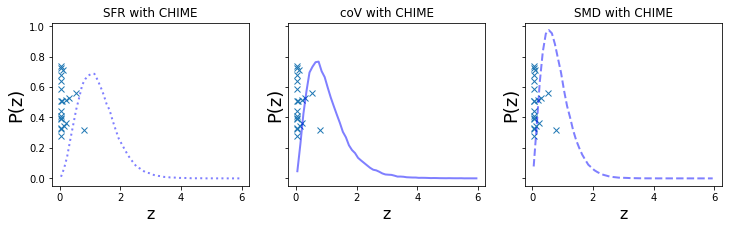

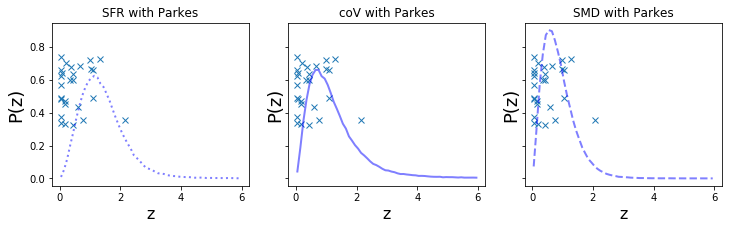

In [7]:
### see how well the obtained redshifts compare to assumed population
### compare shape of likelihood function and compute Bayes factor

#FRBs = GetFRBcat(telescopes=telescopes)

likelihoods = np.zeros( [len(redshift_estimates), len(populations)] )


for tele in telescopes:
    ix_tele, = np.where( redshift_estimates['telescope'] == tele )

#    ix_tele, = np.where( FRBs['tele'] == telescopes_FRBcat[tele] )
#    fig, ax = plt.subplots()
#    ax.set_title( tele ) #"%s with %s" % (pop, tele) )
#    ax.plot( redshift_estimates[ix_tele,-2], 0.75-0.5*np.random.rand(len(ix_tele)), marker='x', linestyle=' ' )

    fig, axs = plt.subplots(1,3,figsize=(12,3), sharey=True)
    y_FRBs = 0.75-0.5*np.random.rand(len(ix_tele))
    
#    for ipop, (pop, linestyle) in enumerate(zip(populations, linestyles_population)):

    for ipop, (pop, linestyle, ax) in enumerate(zip(populations, linestyles_population, axs)):
        estimates = redshift_estimates['redshift'+pop]
        ax.set_title( "%s with %s" % (pop, tele) )
        ax.plot( estimates[ix_tele], y_FRBs, marker='x', linestyle=' ' )
#        ax.plot( estimates[ix_tele], y_FRBs, marker='x', linestyle=' ' )

##        P, x = Histogram( estimates[ix_tele], bins=60, range=(0,6), log=False, density=True )
##        PlotLikelihood( x=x, P=P, log=False, measure='z', ax=ax, linestyle=linestyle, label=pop, color='black' )
        P, x = GetLikelihood_Redshift( population=pop, telescope=tele )
        PlotLikelihood( x=x, P=P, log=False, label=pop, measure='z', ax=ax, linestyle=linestyle, linewidth=2, alpha=0.5, color='blue' )
    
        likelihoods[ix_tele,ipop] = Likelihoods( measurements=estimates[ix_tele], P=P, x=x )
#    ax.legend()
plt.show()

        
likelihoods /= likelihoods[:,0].repeat( likelihoods.shape[1] ).reshape( *likelihoods.shape )

[[1.         1.17555536 1.35177273]
 [1.         1.62202208 2.15221885]
 [1.         3.00921909 4.46279859]
 [1.         1.59676688 2.44339367]
 [1.         1.70809974 2.53318382]
 [1.         1.30918058 1.66693484]
 [1.         0.9119053  0.94763613]
 [1.         0.99307201 1.12824745]
 [1.         0.97737121 0.94301891]
 [1.         0.63669442 0.31156516]
 [1.         2.05774295 3.13487093]
 [1.         0.80764053 0.74480874]
 [1.         0.93092165 1.12824745]
 [1.         3.56586881 5.98004985]
 [1.         3.01902079 4.94272224]
 [1.         2.38510301 3.77486458]
 [1.         2.05774295 3.13487093]
 [1.         0.9119053  0.94763613]
 [1.         1.50703304 2.06023737]
 [1.         3.56586881 5.98004985]
 [1.         2.05774295 3.13487093]
 [1.         2.38510301 3.77486458]
 [1.         1.50703304 2.04567982]
 [1.         3.56586881 5.98004985]]
[1.00000000e+00 1.21984705e+05 6.55359290e+07]


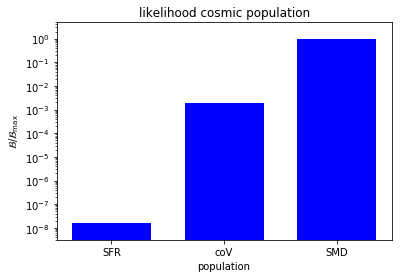

In [14]:

## only use FRBs with reasonable redshift estimates
#ix_reasonable, = np.where(redshift_estimates['redshiftSMD'][ix_tele]<4.5)*(redshift_estimates['redshiftSMD'][ix_tele]>0.05)
ix_reasonable, = np.where( redshift_estimates['redshiftSMD']>0.15 )

print( likelihoods[ ix_reasonable  ] )
bayes = np.prod( likelihoods[ ix_reasonable  ], axis=0 )

print(bayes)

PlotBayes( x=populations, bayes=bayes, width=0.7, label='population', title='likelihood cosmic population' )

plt.show()

In [16]:
sigma_probability

{1: 0.682689492, 2: 0.954499736, 3: 0.997300204, 4: 0.99993666, 5: 0.999999427}

[[1.         0.97737121 0.94301891]]


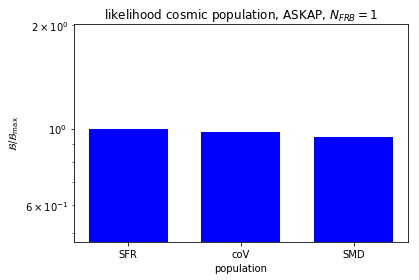

[[1.         1.17555536 1.35177273]
 [1.         1.62202208 2.15221885]
 [1.         3.00921909 4.46279859]
 [1.         1.59676688 2.44339367]
 [1.         1.70809974 2.53318382]]


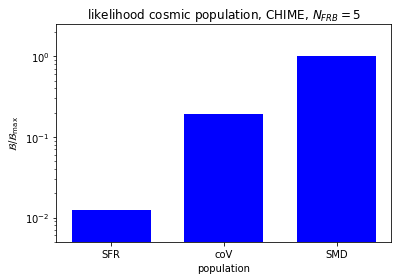

[[1.         1.30918058 1.66693484]
 [1.         0.9119053  0.94763613]
 [1.         0.99307201 1.12824745]
 [1.         0.63669442 0.31156516]
 [1.         2.05774295 3.13487093]
 [1.         0.80764053 0.74480874]
 [1.         0.93092165 1.12824745]
 [1.         3.56586881 5.98004985]
 [1.         3.01902079 4.94272224]
 [1.         2.38510301 3.77486458]
 [1.         2.05774295 3.13487093]
 [1.         0.9119053  0.94763613]
 [1.         1.50703304 2.06023737]
 [1.         3.56586881 5.98004985]
 [1.         2.05774295 3.13487093]
 [1.         2.38510301 3.77486458]
 [1.         1.50703304 2.04567982]
 [1.         3.56586881 5.98004985]]


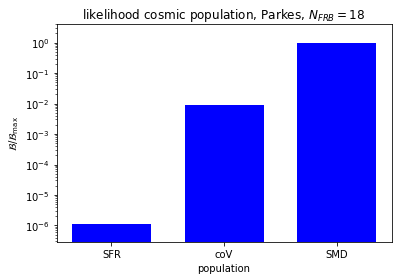

In [17]:
for tele in telescopes:
    ix_tele, = np.where( redshift_estimates['telescope'][ix_reasonable] == tele )
    ls = likelihoods[ix_reasonable[ix_tele]]
    print(ls)
    bayes = np.prod( ls, axis=0 )
#    bayes = np.prod( likelihoods[ (redshift_estimates[:,0]<4.5)*(redshift_estimates[:,0]>0.05)  ], axis=0 )
    PlotBayes( x=populations, bayes=bayes, width=0.7, label='population', title='likelihood cosmic population, %s, $N_{FRB} = %i$' % ( tele, len( ix_tele ) ) )

    plt.show()